<a href="https://colab.research.google.com/github/dealxng/ML-vvsu-2025/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ Практика 2: Статистика в действии и её влияние на модель

## **Цель занятия:**
Изучить, как статистические метрики (среднее, медиана, квантили, размер выборки, стандартное отклонение) влияют на анализ данных и построение моделей машинного обучения. На практике мы проведем анализ целевой переменной **Y**, обучим модель линейной регрессии и исследуем влияние статистических характеристик на метрики модели.

## **Задание состоит из следующих частей:**
1. Анализ целевой переменной **Y** с точки зрения статистики. (в нашем случае - бинарная классификация)
2. Анализ пропусков
2. Изучение влияния статистических метрик на данные.
3. Обучение модели линейной регрессии и оценка ее точности.
4. Проведение теста Пирсона.
5. Визуализация результатов и анализ влияния статистики на метрики модели.
6. Валидация модели
---

## 1. Анализ целевой переменной Y с точки зрения статистики

### **Описание:**
В этом разделе вы проведете статистический анализ целевой переменной **Y**, изучите ее распределение и основные статистические характеристики.

1. **Импортируйте необходимые библиотеки:**

In [1]:
!pip install pandas scikit-learn seaborn scipy

In [2]:
   import pandas as pd
   import numpy as np
   import matplotlib.pyplot as plt
   import seaborn as sns
   from scipy import stats

2. **Загружаем набор данных:**

In [3]:
# Загрузка набора данных
df = pd.read_csv('/content/diamond.csv')

In [4]:
df

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206


In [5]:
# для удобства распечатаем все колонки
for column in df.columns:
  print(f'колонка: {column}')

колонка: Carat Weight
колонка: Cut
колонка: Color
колонка: Clarity
колонка: Polish
колонка: Symmetry
колонка: Report
колонка: Price


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


3. **Проверьте наличие пропущенных значений и работа с пропусками для числовых:**

In [7]:
# Проверка на пропущенные значения
print(df.isnull().sum()) # пропусков нет

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [8]:
# генерируем случайную последовательность
np.random.seed(50)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'Price'] = np.nan

In [9]:
# Проверка на пропущенные значения
print(df_test_nan.isnull().sum()) # пропусков нет

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           5
dtype: int64


In [10]:
# Удаление строк с пропусками
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df.isnull().sum())


# Удаление строк с пропусками
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [11]:
# Заполнение пропусков медианой
df_median = df_test_nan.copy()
df_median.Price = df_median.Price.fillna(df_median.Price.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum())


# Заполнение пропусков медианой
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [12]:
# Заполнение пропусков средним
df_mean = df_test_nan.copy()
df_mean.Price = df_mean.Price.fillna(df_median.Price.mean())

print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum()) # пропусков нет


# Заполнение пропусков средним
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


⏰ Заполнение категориальных признаков происходит с помощью df.category_variable.mode()

4. **Выбираем целвую переменную**

⏰ В качестве целевой выбираем категориальную переменную, либо превращаем числовую в категориальное

```В датасете целевой переменной была выбрана ideal_diamond, которая была преобразована из CUT. Если Cut = ideal или signature-idel, то мы берём данную переменную```

In [28]:
df['ideal_diamond'] = np.where((df['Cut'] == "Ideal") | (df['Cut'] == "Signature-Ideal") , True, False)

In [29]:
df.columns

Index(['Carat Weight', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry',
       'Report', 'Price', 'ideal_diamond'],
      dtype='object')

In [30]:
Y = df['ideal_diamond'] # выбираем целевую переменную (категориальную)
X = df.drop('ideal_diamond', axis=1) # переменные для проверки влияния

X = X.drop('Cut', axis=1)

5. **Графический анализ**

In [31]:
# Список для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,Carat Weight,Price
0,1.10,5169
1,0.83,3470
2,0.85,3183
3,0.91,4370
4,0.83,3171
...,...,...
5995,1.03,6250
5996,1.00,5328
5997,1.02,6157
5998,1.27,11206


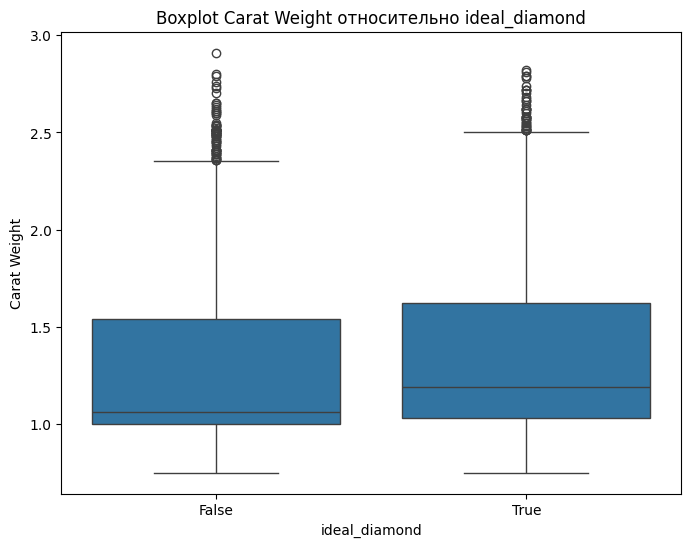

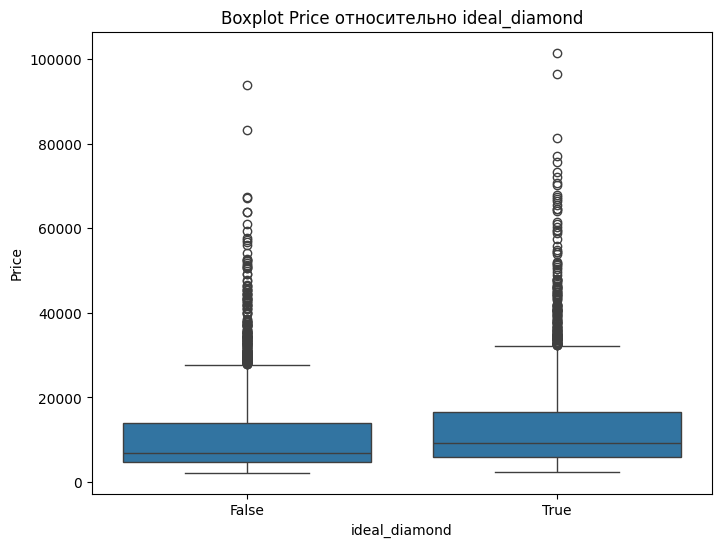

In [32]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='ideal_diamond', y=col, data=df)
    plt.title(f'Boxplot {col} относительно ideal_diamond')
    plt.show()

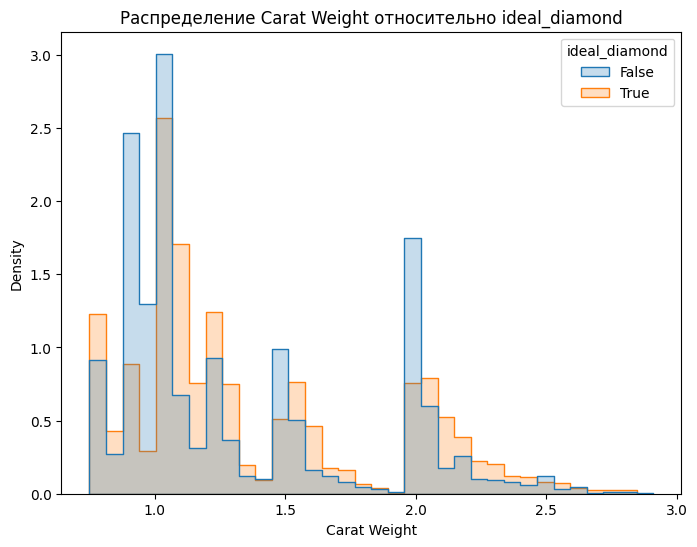

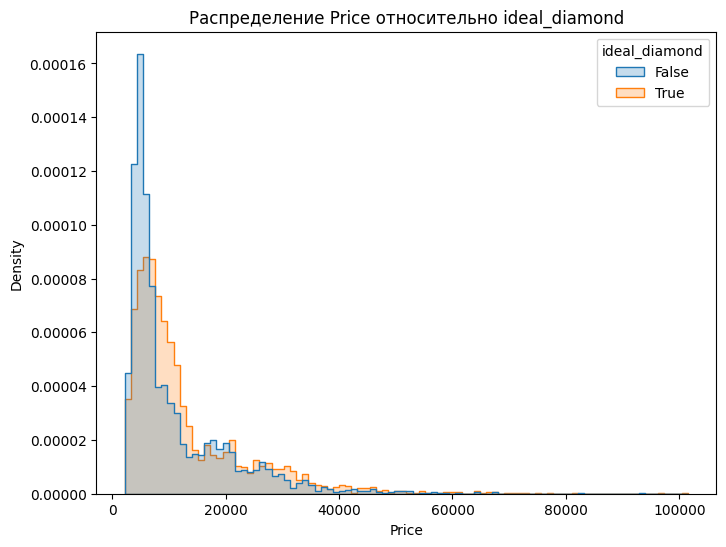

In [33]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='ideal_diamond', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно ideal_diamond')
    plt.show()

⏰ проанализировать график, выделить значимые признаки относительно Y

In [34]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('ideal_diamond')[df.select_dtypes(include=[np.number]).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('ideal_diamond')[df.select_dtypes(include=['object']).columns].describe()

### Описание полученных результатов
⏰ ```Необходимо сделать подобное описание для своих переменных```

In [35]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('ideal_diamond')[col].describe())
    print("\n" + "="*50 + "\n")


Описательная статистика для Carat Weight:

                count      mean       std   min   25%   50%   75%   max
ideal_diamond                                                          
False          3265.0  1.308224  0.470524  0.75  1.00  1.06  1.54  2.91
True           2735.0  1.365912  0.480001  0.75  1.03  1.19  1.62  2.82


Описательная статистика для Price:

                count          mean           std     min     25%     50%  \
ideal_diamond                                                               
False          3265.0  10795.538744   9400.601783  2184.0  4759.0  6746.0   
True           2735.0  12980.636929  10930.921766  2383.0  5985.5  9182.0   

                   75%       max  
ideal_diamond                     
False          13953.0   93813.0  
True           16529.0  101561.0  




In [40]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


Cut                         Color                 Clarity  \
              count unique        top  freq count unique top freq   count   
ideal_diamond                                                               
False          3265      3  Very Good  2428  3265      6   G  747    3265   
True           2735      2      Ideal  2482  2735      6   G  754    2735   

                      ... Polish       Symmetry                  Report  \
              unique  ...    top  freq    count unique top  freq  count   
ideal_diamond         ...                                                 
False              6  ...     VG  1675     3265      4  VG  1664   3265   
True               7  ...     EX  1397     2735      4  EX  1360   2735   

                                 
              unique  top  freq  
ideal_diamond                    
False              2  GIA  3108  
True               2  GIA  2158  

[2 rows x 24 columns]

Опичание статистики для числовых переменных:
- Carat Weight (Карат):
  - Больше данных когда ideal_dimond = False, тое сть у нас меньше идеальных бриллиантов.
  - В среднем и на проиежутках 25%, 50% и 75% карат у идеальных бриллиантов больше, чем у не идеальных
- Price (Цена):
  - Разброс цены у идеальных бриллиантов больше на примерно 1500, чем у не идеальных бриллиантов. Это говорит о том, что идеальные бриллианты менее стабильны в своей цене.
  - Минимальные цены на идеальные и не идеальные бриллианты незначительно отличается, однако цена у идеальных бриллиантов растёт значчительно быстрее, чем у не идеальных бриллиантов.


Для группы False (is_best_diamond = False):
- Color (Цвет):
  - Количество уникальных значений: 6
  - Наиболее частое значение (top): "G"
  - Частота наиболее частого значения (freq): 747
- Clarity (Прозрачность):
  - Количество уникальных значений: 6
  - Наиболее частое значение (top): "SI1"
  - Частота наиболее частого значения (freq): 1308
- Polish (Полировка):
  - Количество уникальных значений: 4
  - Наиболее частое значение (top): "VG"
  - Частота наиболее частого значения (freq): 1375
- Symmetry (Симметрия):
  - Количество уникальных значений: 4
  - Наиболее частое значение (top): "VG"
  - Частота наиболее частого значения (freq): 1664
- Report (Отчет):
  - Количество уникальных значений: 2
  - Наиболее частое значение (top): "GIA"
  - Частота наиболее частого значения (freq): 3108

Для группы True (is_best_diamond = True):
- Color (Цвет):
  - Количество уникальных значений: 6
  - Наиболее частое значение (top): "G"
  - Частота наиболее частого значения (freq): 754
- Clarity (Прозрачность):
  - Количество уникальных значений: 7
  - Наиболее частое значение (top): "SI1"
  - Частота наиболее частого значения (freq): 751
- Polish (Полировка):
  - Количество уникальных значений: 4
  - Наиболее частое значение (top): "EX"
  - Частота наиболее частого значения (freq): 1397
- Symmetry (Симметрия):
  - Количество уникальных значений: 4
  - Наиболее частое значение (top): "EX"
  - Частота наиболее частого значения (freq): 1360
- Report (Отчет):
  - Количество уникальных значений: 2
  - Наиболее частое значение (top): "GIA"
  - Частота наиболее частого значения (freq): 2158

Таким образом, данная таблица показывает, выборка is_best_diamond = False имеет преимущественно "G" цвет, "SI1" прозрачность, "VG" полировку и симметрию, а также в основном использует отчеты "GIA". Выборка is_best_diamond = True характеризуется "G" цветом, "SI1" прозрачностью, "EX" полировкой и симметрией и также в основном использует отчеты "GIA".
Идеальные бриллианты отличаются от не идеальных бриллиантов полировкой и симетрией. У идеальных бриллиантов она лучше.

## 2. Расчет теста Пирсона

### **Описание:**
Вы рассчитаете коэффициенты корреляции Пирсона между Y и каждым из признаков X, чтобы оценить значимость этих корреляций.

### **Шаги:**

1. **Рассчитайте коэффициенты корреляции Пирсона для каждого признака:**

In [41]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,Carat Weight,Price
Carat Weight,1.000000,0.858562
Price,0.858562,1.000000


2. ⏰ **Интерпретируйте результаты:**


### Интерпретация:
- **Коэффициент корреляции Пирсона** показывает степень линейной связи между двумя переменными.

### Описание корреляций для значимых признаков:



1. **Alcohol и Quality (0.444)**:
   - Есть умеренная положительная корреляция между содержанием алкоголя и качеством вина. Это указывает на то, что вина с более высоким содержанием алкоголя чаще оцениваются выше. Этот признак может быть значимым для прогнозирования качества вина, поскольку он имеет достаточно сильную связь с целевой переменной.

2. **Alcohol и is_best_wine (0.390)**:
   - Похожая корреляция наблюдается между содержанием алкоголя и принадлежностью вина к категории лучших (is_best_wine). Более высокое содержание алкоголя коррелирует с вероятностью, что вино будет оценено как "лучшее".

3. **Quality и is_best_wine (0.759)**:
   - Как и ожидалось, очень высокая корреляция между качеством вина и принадлежностью к категории лучших вин. Это обусловлено тем, что признак `is_best_wine` напрямую основан на значении `quality`.

4. **Total Sulfur Dioxide и Free Sulfur Dioxide (0.720)**:
   - Высокая корреляция между общим и свободным диоксидом серы. Это вполне ожидаемо, так как общий диоксид серы включает в себя свободную и связанную формы. В этом случае один из признаков может быть исключен для предотвращения избыточности информации в модели.

5. **Residual Sugar и Density (0.553)**:
   - Средняя положительная корреляция между остаточным сахаром и плотностью вина. Более высокое содержание остаточного сахара увеличивает плотность вина, что логично, так как сахар увеличивает массу раствора. Этот признак также может вызвать мультиколлинеарность.

6. **Density и Alcohol (-0.687)**:
   - Сильная отрицательная корреляция между плотностью и содержанием алкоголя. Вина с высоким содержанием алкоголя имеют меньшую плотность, что объясняется физическими свойствами спирта. Это важно учитывать при построении моделей, чтобы избежать мультиколлинеарности.

7. **Alcohol и Density (-0.686)**:
   - Как уже упоминалось, это значительная отрицательная корреляция. В этом случае, возможно, стоит исключить один из этих признаков для предотвращения мультиколлинеарности.

### Почему мультиколлинеарность это плохо?

Мультиколлинеарность возникает, когда два или более независимых признака сильно коррелируют друг с другом. Это приводит к нескольким проблемам:

1. **Переоценка значимости признаков**:
   - Когда признаки сильно коррелированы, модель может "перепутать" влияние каждого из них на целевую переменную, что приведет к ненадежным коэффициентам. Это затрудняет интерпретацию модели, поскольку сложно понять, какой из признаков действительно важен.

2. **Нестабильность модели**:
   - При наличии мультиколлинеарности небольшие изменения в данных могут привести к большим изменениям в коэффициентах модели. Это делает модель нестабильной и менее устойчивой.

3. **Затруднение выбора значимых признаков**:
   - Модель может затрудняться при выделении важности отдельных признаков, если они сильно связаны друг с другом. Это может усложнить процесс отбора признаков и снизить точность модели.

4. **Увеличение дисперсии коэффициентов**:
   - Мультиколлинеарность увеличивает дисперсию оценок коэффициентов регрессии, что делает их менее надежными. В результате, некоторые признаки могут казаться незначимыми, хотя на самом деле они играют важную роль.

## 3. Немного машинного обучения

- отберем признаки (числовые и категориальные отдельно)
- обработаем числовые и категориальыне
- обучим модель
- узнаем что влияет на Y

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [55]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Категориальные признаки:", categorical_features)


Категориальные признаки: ['Color', 'Clarity', 'Polish', 'Symmetry', 'Report']


In [56]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [57]:
X_processed

,Carat Weight,Price,Color_E,Color_F,Color_G,Color_H,Color_I,Clarity_IF,Clarity_SI1,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,1.10,5169,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True
1,0.83,3470,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False
2,0.85,3183,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True
3,0.91,4370,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True
4,0.83,3171,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.03,6250,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
5996,1.00,5328,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True
5997,1.02,6157,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
5998,1.27,11206,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True


In [58]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64', 'int64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['Carat Weight', 'Price']


In [59]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])


In [60]:
X_processed

,Carat Weight,Price,Color_E,Color_F,Color_G,Color_H,Color_I,Clarity_IF,Clarity_SI1,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,0.162037,0.030037,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True
1,0.037037,0.012941,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False
2,0.046296,0.010053,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True
3,0.074074,0.021997,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True
4,0.037037,0.009932,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.129630,0.040915,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
5996,0.115741,0.031637,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True
5997,0.125000,0.039979,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
5998,0.240741,0.090786,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True


### Шаг 3: Объяснение логистической регрессии


Логистическая регрессия — это статистический метод для анализа набора данных, в котором одна или более независимых переменных определяют исход (зависимую переменную), которая является бинарной (т.е. принимает только два возможных значения, например, 0 и 1). Целью логистической регрессии является нахождение наилучшей модели, описывающей связь между независимыми переменными и вероятностью определенного исхода.

Основные характеристики:

Функция логита (логистическая функция): Используется для моделирования вероятности принадлежности наблюдения к определенному классу.
Выводы о влиянии признаков: Коэффициенты модели показывают, как изменение признака влияет на логарифм отношения шансов.

**Функция для обучения и оценки модели**

In [61]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [62]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.7517
Точность на тестовой выборке: 0.7533

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

       False       0.77      0.79      0.78       653
        True       0.74      0.71      0.72       547

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200



**Пояснение:**

- Точность (Accuracy): Доля правильных предсказаний от общего числа предсказаний.
- Precision (Точность): Доля правильных положительных предсказаний среди всех положительных предсказаний.
- Recall (Полнота): Доля правильно предсказанных положительных случаев среди всех реальных положительных случаев.
- F1-score: Гармоническое среднее между точностью и полнотой.

In [63]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])


         Feature  Coefficient
16    Symmetry_G    -2.726297
14     Polish_ID     2.303462
19    Report_GIA     2.159321
1          Price     1.696853
13      Polish_G    -1.649281
17   Symmetry_ID     1.648699
18   Symmetry_VG    -1.196436
0   Carat Weight    -0.471935
15     Polish_VG    -0.430842
8    Clarity_SI1    -0.378973
3        Color_F    -0.303827
10   Clarity_VS2    -0.213296
2        Color_E    -0.136710
11  Clarity_VVS1     0.136567
7     Clarity_IF    -0.101520
6        Color_I     0.101042
5        Color_H     0.098726
4        Color_G     0.098008
12  Clarity_VVS2     0.052739
9    Clarity_VS1    -0.022923


**Пояснение:**

- Коэффициенты показывают влияние признака на вероятность принадлежности к классу 1 (лучшие вина).
- Положительный коэффициент: Увеличение признака повышает вероятность принадлежности к классу 1.
- Отрицательный коэффициент: Увеличение признака снижает вероятность принадлежности к классу 1.

## 4. Построение модели логистической регрессии для предсказания качества вина

- **Модель логистической регрессии успешно обучена для предсказания лучших вин.**
- **Точность на обучающей и тестовой выборках высока, что указывает на хорошую способность модели обобщать данные.**
- **Анализ коэффициентов показал, какие признаки наиболее влияют на качество вина:**
  - **Содержание алкоголя и сульфатов положительно влияют на качество.**
  - **Плотность и летучая кислотность отрицательно влияют на качество.**
- **Преобразование категориальных признаков и нормализация числовых признаков улучшили качество модели и упростили интерпретацию результатов.**


### 4.1 Кросс-валидация модели

In [64]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.7508
Отклонение точности: 0.0125


In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

### 4.2 Построение ROC-кривой

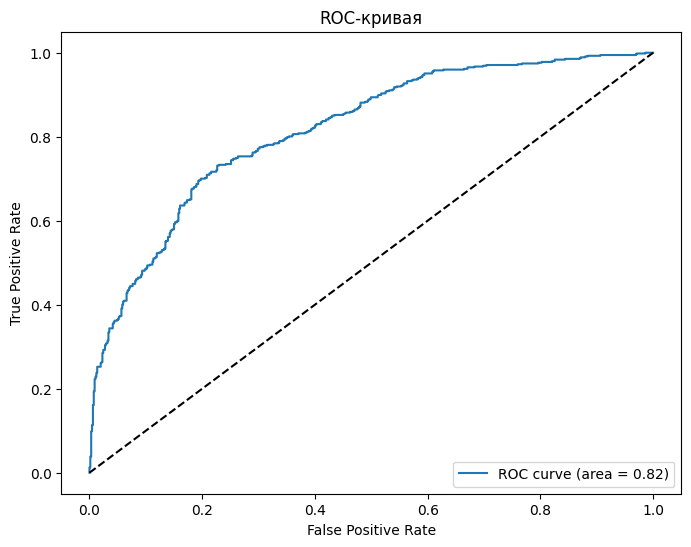

In [69]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

## ⏰ Доп задание

Изучить различные метрики качества классификационных моделей и понять, в каких ситуациях они наиболее информативны.

**Метрики для исследования:**
- Accuracy (Точность)
- Precision (Точность)
- Recall (Полнота)
- F1 Score
- ROC-AUC
- Log Loss

**Попробовать другие модели и сравнить результат метрик**

**Попробовать другие методы отбора признаков**

**Использовать параметры модели и исследовать влияние на предсказание**

## Заключение

Мы успешно построили модель логистической регрессии для предсказания лучших вин на основе химических характеристик. Преобразование данных и анализ коэффициентов модели позволили нам понять влияние различных признаков на качество вина.


---

# Примечания

- **Логистическая регрессия** является мощным инструментом для бинарной классификации и позволяет интерпретировать результаты через коэффициенты модели.
- **Преобразование категориальных признаков** (One-Hot Encoding) и **нормализация числовых признаков** являются стандартными шагами предобработки данных для многих алгоритмов машинного обучения.
- **Анализ коэффициентов модели** помогает понять, какие признаки наиболее значимы и как они влияют на предсказания.

---

# Дополнительная литература

- **Логистическая регрессия:**
  - [Документация scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- **Предобработка данных:**
  - [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
  - [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- **Метрики качества модели:**
  - [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
  - [ROC-кривая и AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

---